In [42]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [62]:
DATASET = "ground_truth_heiner_presentation_large_blackbg"
DATASET_DIR = Path("outputs/compressed") / DATASET

# resize
size = (64, 64)

selected_intervention_labels = [3]

handpicked_indices = [18, 15, 13, 12]

In [63]:
tag = "train"
data = np.load(DATASET_DIR / f"{tag}.npz")

In [64]:
imgs = data["imgs"]
epsilon = data["epsilon"]
original_latents = data["original_latents"]
intervention_labels = data["intervention_labels"]

In [65]:
if size is not None:
    imgs = np.array(
        [
            [np.array(Image.fromarray(x).resize(size, Image.BICUBIC)) for x in imgs[i]]
            for i in range(imgs.shape[0])
        ]
    )

In [66]:
if len(selected_intervention_labels) > 0:
    imgs = imgs[np.isin(intervention_labels, selected_intervention_labels)]
    epsilon = epsilon[np.isin(intervention_labels, selected_intervention_labels)]
    original_latents = original_latents[np.isin(intervention_labels, selected_intervention_labels)]
    intervention_labels = intervention_labels[
        np.isin(intervention_labels, selected_intervention_labels)
    ]

In [67]:
if len(handpicked_indices) > 0:
    imgs = imgs[handpicked_indices]
    epsilon = epsilon[handpicked_indices]
    original_latents = original_latents[handpicked_indices]
    intervention_labels = intervention_labels[handpicked_indices]

In [68]:
imgs.shape, epsilon.shape, original_latents.shape

((4, 6, 64, 64, 3), (4, 6, 6), (4, 6, 6))

In [69]:
sequence_length = imgs.shape[1]
sequence_length

6

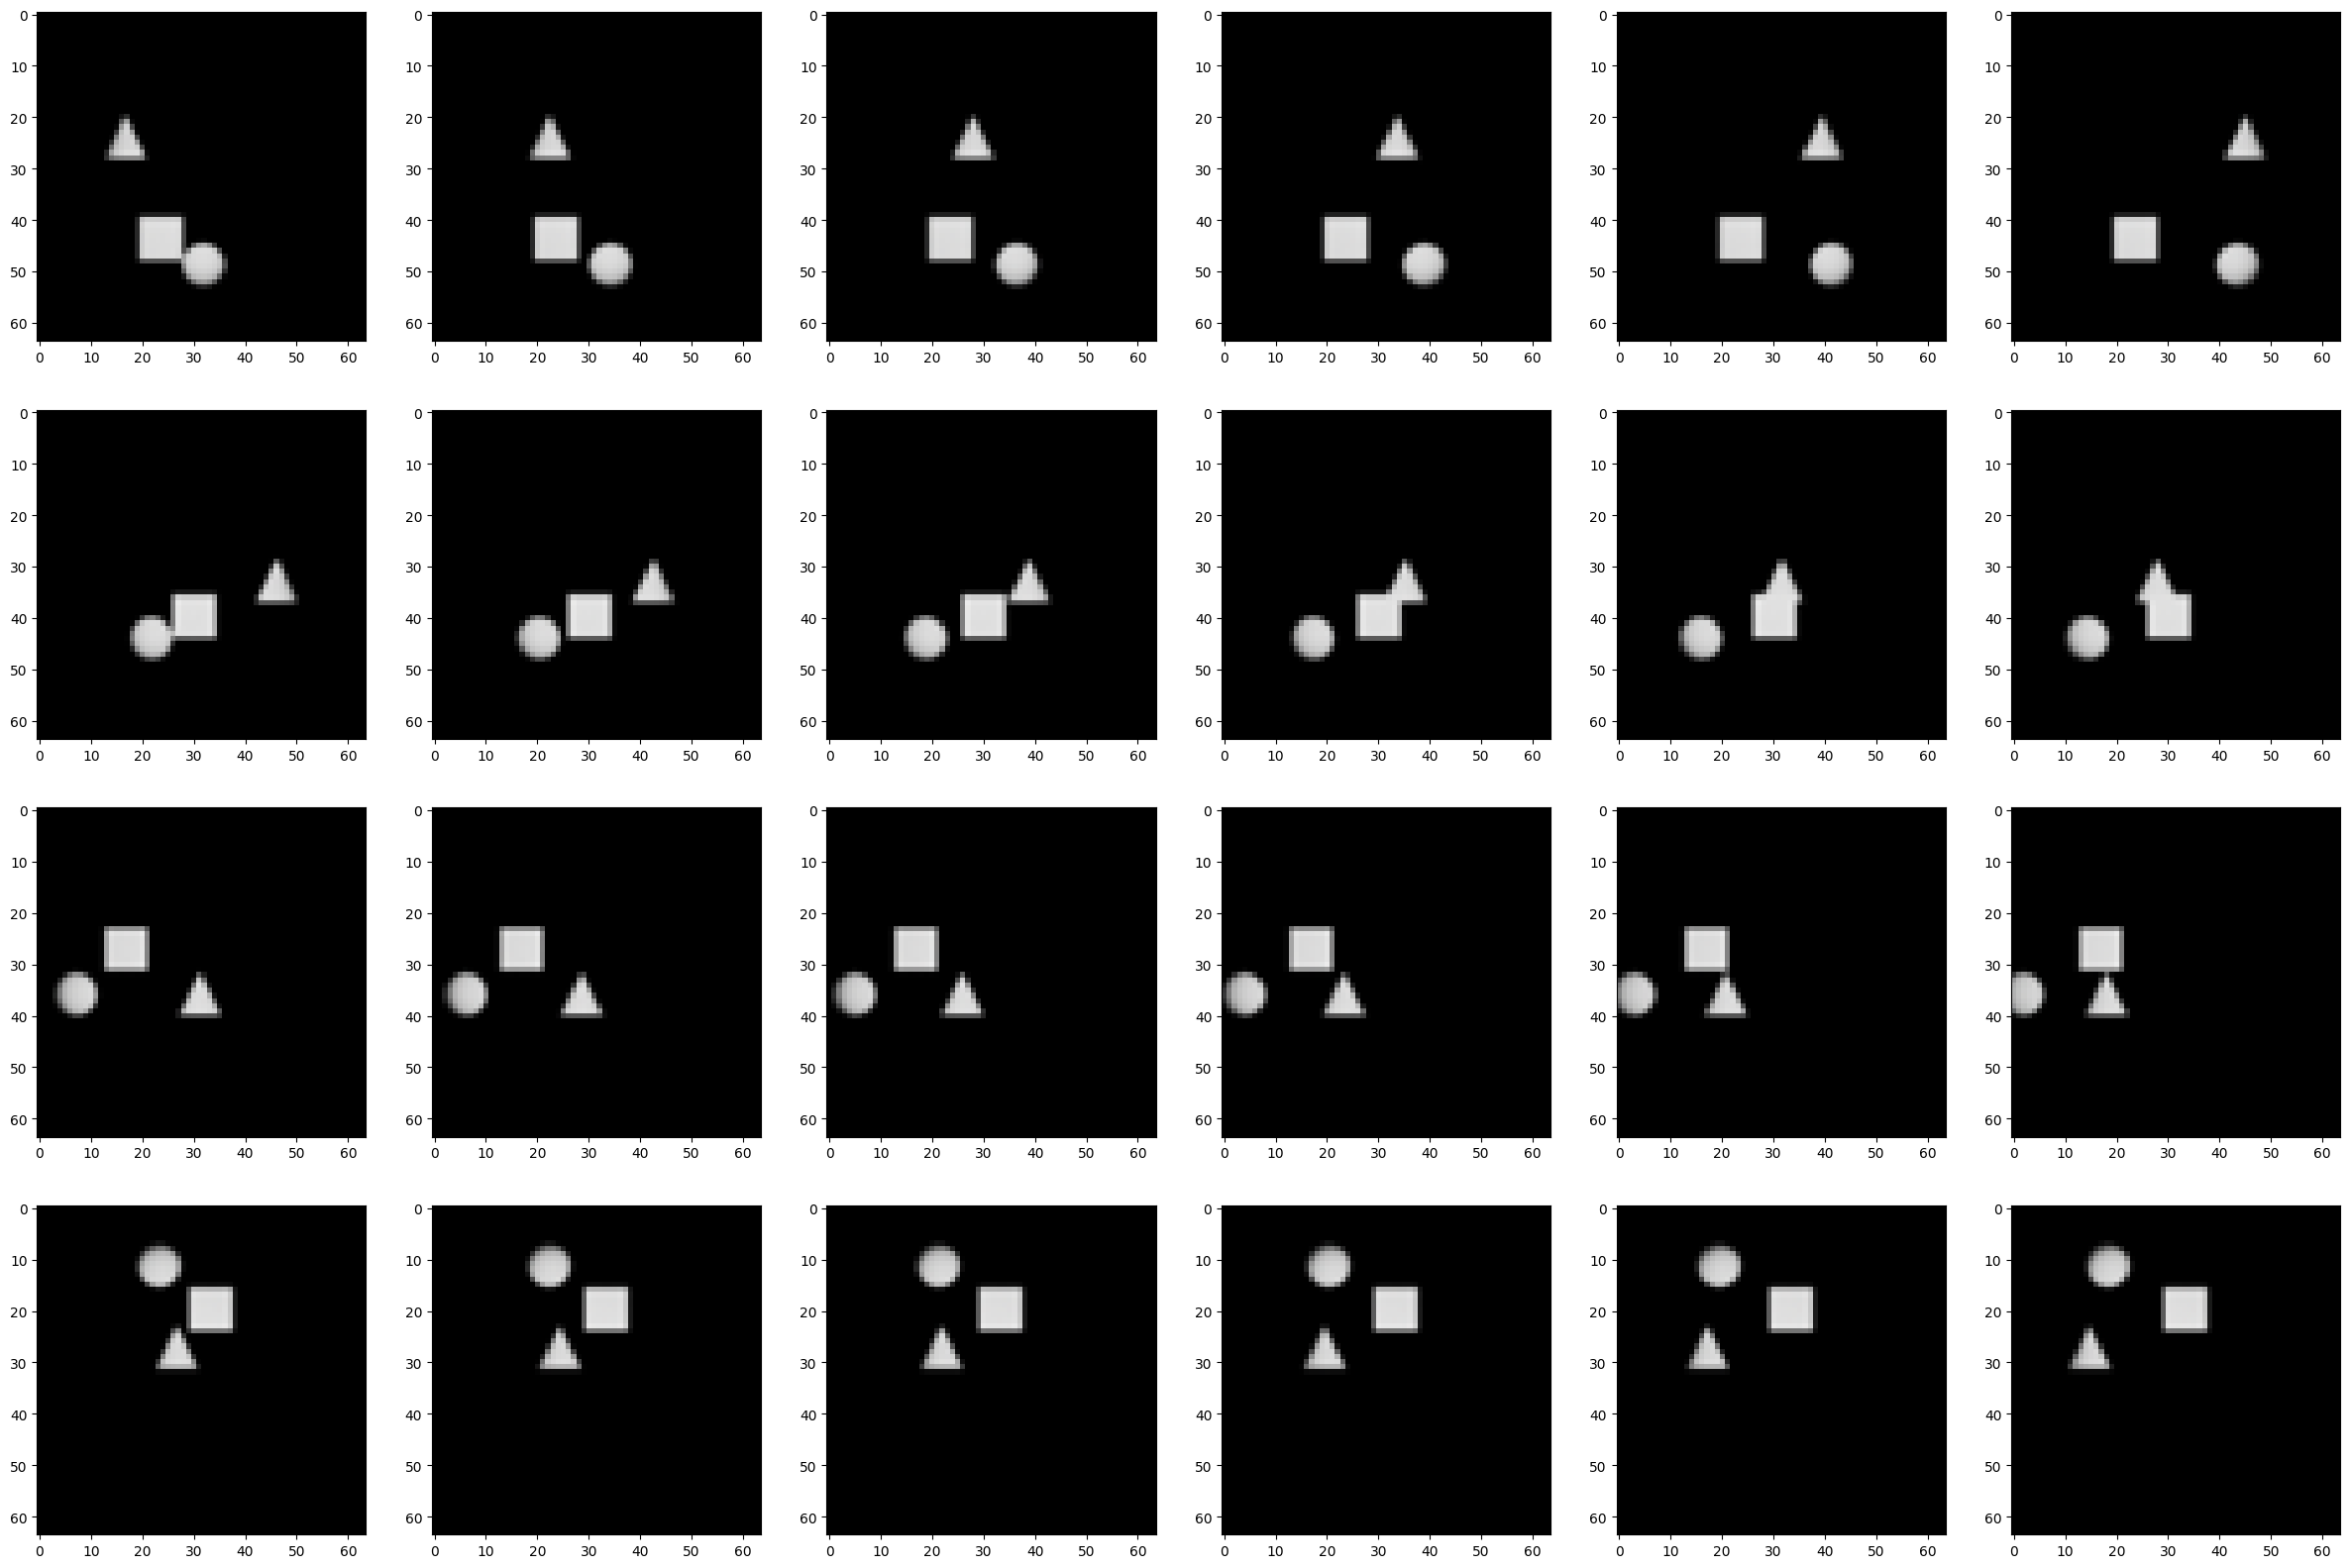

In [70]:
nrows = 4
fig, ax = plt.subplots(ncols=sequence_length, nrows=nrows, figsize=(5 * sequence_length, 5 * nrows))

for i in range(nrows):
    for j in range(sequence_length):
        ax[i, j].imshow(imgs[i, j])
        # ax[i, j].axis("off")

In [71]:
def plot_rows(xs, col_labels=None, nrows=4):
    ncols = len(xs[1])

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(2.5 * ncols, nrows * 2.5),
        # figsize=(15, 15),
        sharex=True,
        sharey=True,
    )

    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i, j] if ncols > 1 else axes[i]
            x = xs[i][j]
            # ax.imshow(x.clip(0, 1).permute(1, 2, 0))
            ax.imshow(x)
            ax.axis("off")
            if col_labels is not None and i == 0 and j < len(col_labels):
                ax.set_title(col_labels[j])

    # Align columns left
    for ax in axes[:, 1:].flatten():
        ax.set_ylabel("")
        ax.yaxis.set_ticklabels([])

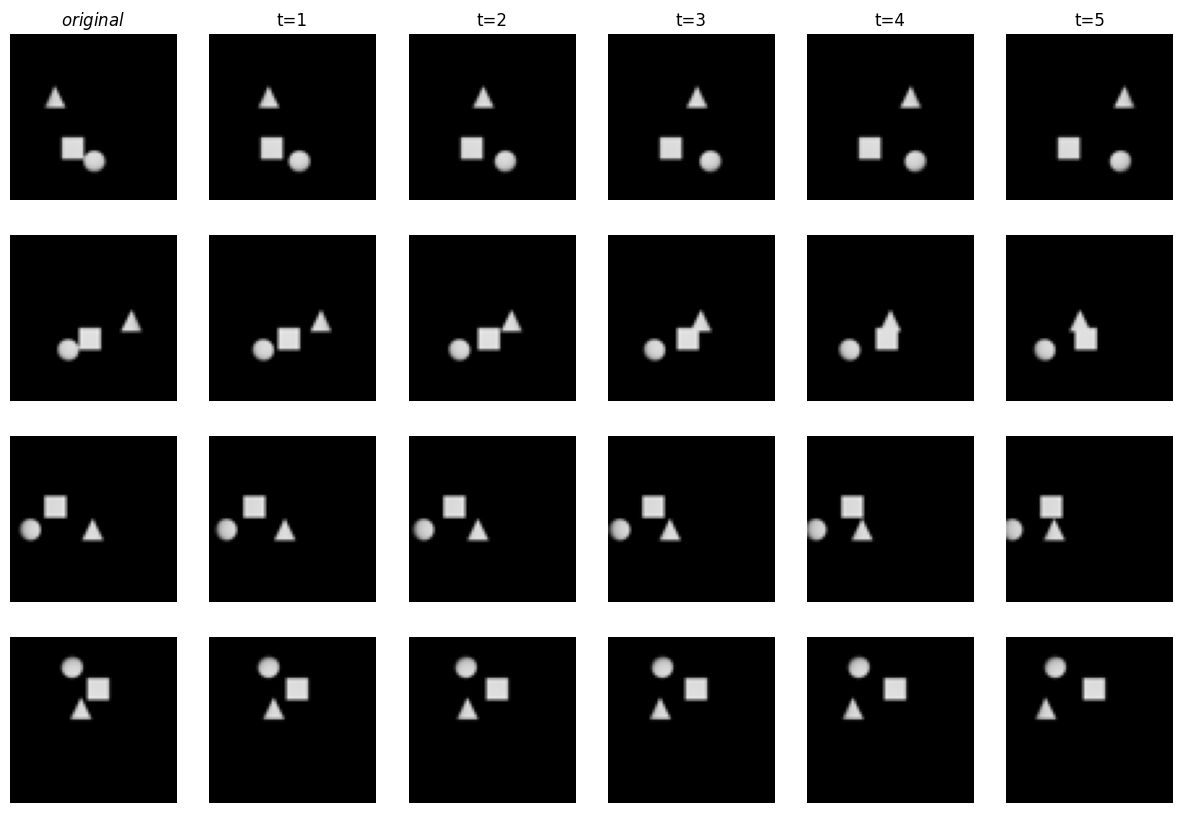

In [72]:
plot_rows(
    imgs,
    col_labels=[f"$original$", *[f"t={t}" for t in range(1, sequence_length)]],
    nrows=len(handpicked_indices),
)

In [9]:
original_latents[2]

array([[-1.7016851 ,  3.245606  ,  3.3720548 , -1.3328986 , -0.32237396,
         0.18983924],
       [-1.7016851 ,  3.016373  ,  3.3720548 , -1.3328986 , -0.32237396,
         0.05499617],
       [-1.7016851 ,  2.7871397 ,  3.3720548 , -1.3328986 , -0.32237396,
        -0.0798469 ],
       [-1.7016851 ,  2.5579064 ,  3.3720548 , -1.3328986 , -0.32237396,
        -0.21468997],
       [-1.7016851 ,  2.3286731 ,  3.3720548 , -1.3328986 , -0.32237396,
        -0.34953302]], dtype=float32)